In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print(data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [3]:
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
df = data[numeric_cols].dropna()

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

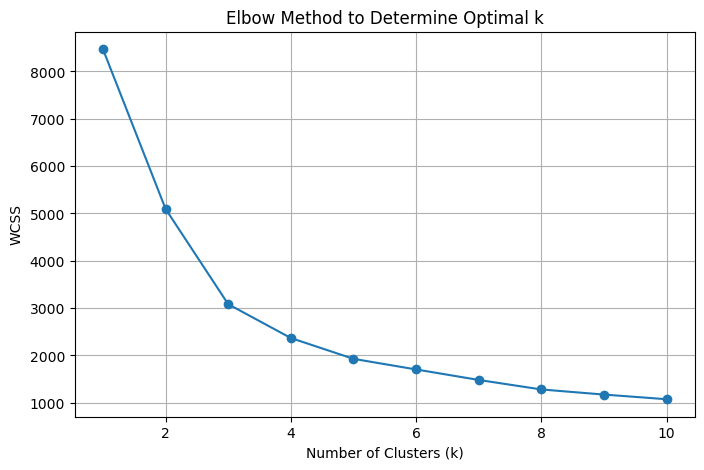

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [7]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans_final.fit_predict(scaled_data)

In [8]:
print("\nCluster Centers (Scaled Data):\n", kmeans_final.cluster_centers_)


Cluster Centers (Scaled Data):
 [[ 0.00340709 -1.31519107 -0.83846133]
 [ 0.89846585  0.64278204  1.10107381]
 [-0.79188456  0.55612886 -0.2525054 ]]


   QUANTITYORDERED  PRICEEACH    SALES  Cluster
0               30      95.70  2871.00        2
1               34      81.35  2765.90        2
2               41      94.74  3884.34        1
3               45      83.26  3746.70        1
4               49     100.00  5205.27        1


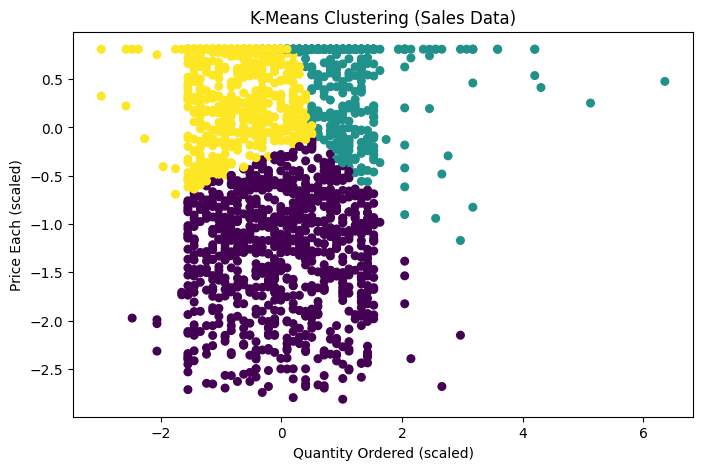

In [9]:
print(df.head())

plt.figure(figsize=(8,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['Cluster'], cmap='viridis', s=30)
plt.title('K-Means Clustering (Sales Data)')
plt.xlabel('Quantity Ordered (scaled)')
plt.ylabel('Price Each (scaled)')
plt.show()